<a href="https://colab.research.google.com/github/natandovale/topic-in-big-data/blob/main/Suicidios_Sus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Baixando libs e dependências**


In [ ]:
!pip install cufflinks
!pip install plotly

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.offline as py
import numpy as np
import plotly.graph_objs as go # criará de fato os gráficos
from plotly.offline import plot, iplot
import cufflinks as cf # para conectar o plotly ao pandas
cf.go_offline()
plotly.offline.init_notebook_mode(connected = True)

In [ ]:
import plotly.io as pio
pio.renderers

In [ ]:
pio.renderers.default = 'colab'

In [ ]:
arquivo = 'https://github.com/natandovale/topic-in-big-data/raw/main/datasusSuicidios_2014_2018%20(1).xlsx'
df = pd.read_excel(arquivo, header=0,engine='openpyxl')

## Perguntas aos Dados



*   Quantas mortes houve no período de 2014 a 2018?
*   Quantos suicidios houve por estado?
*   Qual a taxa de suicidios por idade?
*   Qual estado civil das pessos que se suicidaram?
*   Qual a caracteristica fenotíca das pessoas que se suicidaram?
*   Numero de suicidio entre homens e mulhere?
*   Ocupação da pessoa que se suicidou?



**Renomeiando colunas**

In [ ]:
df = df.rename(columns={'Unnamed: 1': 'ID_ESTADO', 'Unnamed: 2': 'ESTADO', 'Unnamed: 3': 'ANO', 'Unnamed: 4': 'CIRCOBITO', 
                        'Unnamed: 5': 'DTOBITO', 'Unnamed: 6': 'DTNASC', 'Unnamed: 7': 'SEXO', 'Unnamed: 8': 'RACA_COR',
                        'Unnamed: 9':'ESTCIV', 'Unnamed: 10': 'ESC', 'Unnamed: 11':'OCUP', 'Unnamed: 12':'CIDADE', 'Unnamed: 13':'LOCAL',
                        'Unnamed: 14':'ASSISTMED','Unnamed: 15':'IDADE'})

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df = df.drop(0)

In [ ]:
df.columns

Index(['ID_ESTADO', 'ESTADO', 'ANO', 'CIRCOBITO', 'DTOBITO', 'DTNASC', 'SEXO',
       'RACA_COR', 'ESTCIV', 'ESC', 'OCUP', 'CIDADE', 'LOCAL', 'ASSISTMED',
       'IDADE'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58635 entries, 1 to 58635
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID_ESTADO  58635 non-null  object
 1   ESTADO     58635 non-null  object
 2   ANO        58635 non-null  object
 3   CIRCOBITO  56607 non-null  object
 4   DTOBITO    58635 non-null  object
 5   DTNASC     58408 non-null  object
 6   SEXO       58620 non-null  object
 7   RACA_COR   57299 non-null  object
 8   ESTCIV     54306 non-null  object
 9   ESC        45163 non-null  object
 10  OCUP       58635 non-null  object
 11  CIDADE     58635 non-null  object
 12  LOCAL      58464 non-null  object
 13  ASSISTMED  40873 non-null  object
 14  IDADE      58408 non-null  object
dtypes: object(15)
memory usage: 6.7+ MB


**Excluindo campos nulos**

In [ ]:
df.isnull().sum()

ID_ESTADO        0
ESTADO           0
ANO              0
CIRCOBITO     2028
DTOBITO          0
DTNASC         227
SEXO            15
RACA_COR      1336
ESTCIV        4329
ESC          13472
OCUP             0
CIDADE           0
LOCAL          171
ASSISTMED    17762
IDADE          227
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.DTOBITO = pd.to_datetime(df.DTOBITO)

**Criando coluna 'Data_Mes_Obto'**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29600 entries, 1 to 58635
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ID_ESTADO  29600 non-null  object        
 1   ESTADO     29600 non-null  object        
 2   ANO        29600 non-null  object        
 3   CIRCOBITO  29600 non-null  object        
 4   DTOBITO    29600 non-null  datetime64[ns]
 5   DTNASC     29600 non-null  object        
 6   SEXO       29600 non-null  object        
 7   RACA_COR   29600 non-null  object        
 8   ESTCIV     29600 non-null  object        
 9   ESC        29600 non-null  object        
 10  OCUP       29600 non-null  object        
 11  CIDADE     29600 non-null  object        
 12  LOCAL      29600 non-null  object        
 13  ASSISTMED  29600 non-null  object        
 14  IDADE      29600 non-null  object        
dtypes: datetime64[ns](1), object(14)
memory usage: 3.6+ MB


In [ ]:
df['Data_Mes_Obto'] = df.DTOBITO.dt.to_period('M').astype(str)

In [ ]:
mortes_por_mes = df.groupby(by='Data_Mes_Obto').DTOBITO.count()

In [ ]:
df.tail()

,ID_ESTADO,ESTADO,ANO,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACA_COR,ESTCIV,ESC,OCUP,CIDADE,LOCAL,ASSISTMED,IDADE,Data_Mes_Obto
58622,138,TO,2018,Suicídio,2018-02-01,1979-05-27 00:00:00,Masculino,Preta,União consensual,8 a 11 anos,MOTORISTA DE CARRO DE PASSEIO,Lizarda,Via pública,Não,39,2018-02
58631,138,TO,2018,Suicídio,2018-04-16,1989-11-17 00:00:00,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,29,2018-04
58633,138,TO,2018,Suicídio,2018-05-15,1955-08-08 00:00:00,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,63,2018-05
58634,138,TO,2018,Suicídio,2018-07-24,2001-06-27 00:00:00,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,17,2018-07
58635,138,TO,2018,Suicídio,2018-12-28,1976-07-17 00:00:00,Masculino,Preta,União consensual,Nenhuma,0,Natividade,Domicílio,Não,42,2018-12


In [ ]:
type(mortes_por_mes)

pandas.core.series.Series

In [ ]:
# Criando os dados de dispersão
data = [go.Scatter(
    x=mortes_por_mes.index,
    y=mortes_por_mes.values,
    marker={'color': 'black'}
)]

configuracoes_layout = go.Layout(
    yaxis={'title': 'Número de Mortes', 'automargin': True, 'tickfont': {'size': 22}},  # Aumentando o tamanho da fonte dos rótulos do eixo y
    xaxis={'title': 'Período', 'automargin': True, 'tickfont': {'size': 22}}  # Aumentando o tamanho da fonte dos rótulos do eixo x
)

# Criando a figura do gráfico
fig = go.Figure(data=data, layout=configuracoes_layout)

# Plotando o gráfico
py.iplot(fig)

**Graficos mortes por estados**

In [ ]:
suicidios_por_estados = df.groupby(by='ESTADO').ESTADO.count()

In [ ]:
suicidios_por_estados = suicidios_por_estados.sort_values()

In [ ]:
suicidios_ultimos_estados = suicidios_por_estados.tail(13)

In [ ]:
cores = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#800000', '#008000', '#000080',
         '#808000', '#FFA500', '#808080', '#800080']


In [ ]:
type(suicidios_por_estados)

pandas.core.series.Series

In [ ]:
# Criando os dados de barras com as cores definidas e ordem crescente
data = [go.Bar(
    x=suicidios_ultimos_estados.index,
    y=suicidios_ultimos_estados.values,
    marker=dict(color=cores)
)]

# Configurando o layout do gráfico
configuracoes_layout = go.Layout(
    yaxis={'title': 'Número de Mortes','automargin': True, 'tickfont': {'size': 22}},
    xaxis={'title': 'Estado','automargin': True, 'tickfont': {'size': 22}},
    bargap=0.2  # Espaçamento entre as barras
)


# Criando a figura do gráfico
fig = go.Figure(data=data, layout=configuracoes_layout)

# Plotando o gráfico
py.iplot(fig)

In [ ]:
suicidios_por_estados_todos = df.groupby(by='ESTADO').ESTADO.count()
suicidios_por_estados_todos = suicidios_por_estados.sort_values()
# Criando os dados de barras com as cores definidas e ordem crescente
data = [go.Bar(
    x=suicidios_por_estados_todos.index,
    y=suicidios_por_estados_todos.values
)]

# Configurando o layout do gráfico
configuracoes_layout = go.Layout(
    yaxis={'title': 'Número de Mortes'},
    xaxis={'title': 'Estado'},
    bargap=0.2  # Espaçamento entre as barras
)

# Criando a figura do gráfico
fig = go.Figure(data=data, layout=configuracoes_layout)

# Plotando o gráfico
py.iplot(fig)

**Graficos mortes por idades**

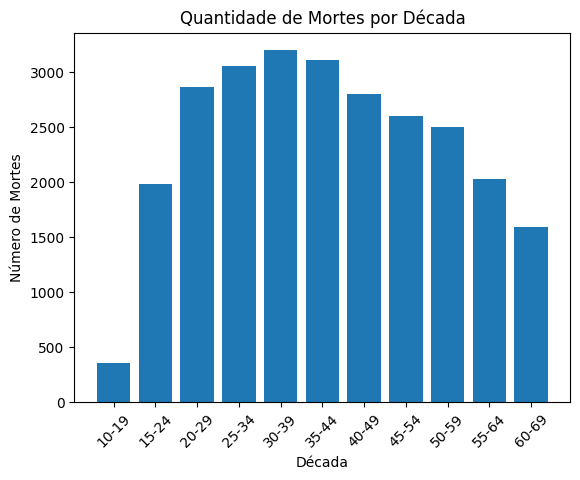

In [ ]:
faixas_idade = list(range(10, 70, 5))

# Criando uma coluna com a década correspondente
df['Decada'] = pd.cut(df['IDADE'], bins=faixas_idade, labels=False, right=False)

# Agrupando os dados e somando o número de mortes por década
mortes_por_decada = df.groupby('Decada').size()

# Criando os rótulos personalizados para as décadas
decadas_labels = [f"{faixa}-{faixa+9}" for faixa in faixas_idade[:-1]]

# Plotando o gráfico de barras
plt.bar(decadas_labels, mortes_por_decada.values)

# Configurando os rótulos e títulos dos eixos
plt.xlabel('Década')
plt.ylabel('Número de Mortes')
plt.title('Quantidade de Mortes por Década')

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.show()

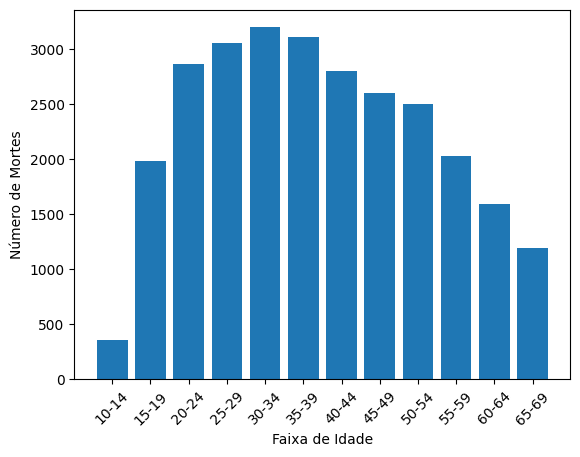

In [ ]:
faixas_idade = list(range(10, 71, 5))

# Criando uma coluna com a faixa de idade correspondente
df['Faixa de Idade'] = pd.cut(df['IDADE'], bins=faixas_idade, labels=False, right=False)

# Agrupando os dados e somando o número de mortes por faixa de idade
mortes_por_faixa = df.groupby('Faixa de Idade').size()

# Criando os rótulos personalizados para as faixas de idade
faixas_labels = [f"{faixa}-{faixa+4}" for faixa in faixas_idade[:-1]]

# Obtendo as 3 maiores barras
maiores_barras = mortes_por_faixa.nlargest(3)

# Obtendo as quantidades das 3 maiores barras
quantidades_maiores_barras = maiores_barras.values

# Plotando o gráfico de barras
plt.bar(faixas_labels, mortes_por_faixa.values)

# Adicionando o texto das quantidades nas barras
for i, qtd in enumerate(mortes_por_faixa.values):
    if faixas_labels[i] in maiores_barras.index:
        plt.text(i, qtd, str(qtd), ha='center', va='bottom')

# Configurando os rótulos e títulos dos eixos
plt.xlabel('Faixa de Idade')
plt.ylabel('Número de Mortes')

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.show()

In [ ]:
# Criando os dados de dispersão
data = [go.Scatter(
    x=mortes_por_mes.index,
    y=mortes_por_mes.values,
    marker={'color': 'black'}
)]

# Configurando o layout do gráfico
configuracoes_layout = go.Layout(
    title='Número de Mortes por Mês',
    yaxis={'title': 'Número de Mortes', 'automargin': True, 'tickfont': {'size': 14}},  
    xaxis={'title': 'Período', 'automargin': True, 'tickfont': {'size': 14}} 
)

# Criando a figura do gráfico
fig = go.Figure(data=data, layout=configuracoes_layout)

# Encontrando os três picos com o maior número de mortes
picos = mortes_por_mes.nlargest(3)

# Adicionando anotações aos três picos
annotations = []
for pico in picos.index:
    annotations.append(
        dict(
            x=pico,
            y=mortes_por_mes.loc[pico],
            text=str(mortes_por_mes.loc[pico]),
            showarrow=True,
            arrowhead=1,
            ax=0,
            ay=-30
        )
    )

fig.update_layout(annotations=annotations)

# Plotando o gráfico
py.iplot(fig)

In [ ]:
data = [go.Histogram(x=df['ESTCIV'])]
layout = go.Layout(title='Estado Civil', xaxis=dict(title='Estado Civil'), yaxis=dict(title='Número de Pessoas'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
#grafico3 = df['RACA_COR'].iplot(kind='hist', yTitle='Numero De Pessoas', xTitle='Cor')
data = [go.Histogram(x=df['RACA_COR'])]
layout = go.Layout(title='Características Fenotípicas', xaxis=dict(title='Cor'), yaxis=dict(title='Número de Pessoas'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
#df['SEXO'].iplot(kind='hist', yTitle='Numero De Pessoas', xTitle='SEXO')
data = [go.Histogram(x=df['SEXO'])]
layout = go.Layout(title='Suicidio entre homens e mulheres', xaxis=dict(title='Sexo'), yaxis=dict(title='Número de Pessoas'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
#df['ESTADO'].iplot(kind='hist', yTitle='Numero De Pessoas', xTitle='Estados')
data = [go.Histogram(x=df['ESTADO'])]
layout = go.Layout(title='Suicidios por Estados', xaxis=dict(title='Estados'), yaxis=dict(title='Número de Pessoas'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
ocupacao_count = df['OCUP'].value_counts().head(10)

In [ ]:
data = [go.Pie(
    labels=ocupacao_count.index,
    values=ocupacao_count.values
)]

# Configurando o layout do gráfico
layout = go.Layout(
    title='Ocupação'
)

# Criando a figura do gráfico
fig = go.Figure(data=data, layout=layout)

# Plotando o gráfico
py.iplot(fig)